Example

In [6]:
# import necessary libraries for data analysis and visualization in Python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# import bitcoin and ether data 

df = pd.read_csv(
    'data/btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

In [8]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<Axes: xlabel='Timestamp'>

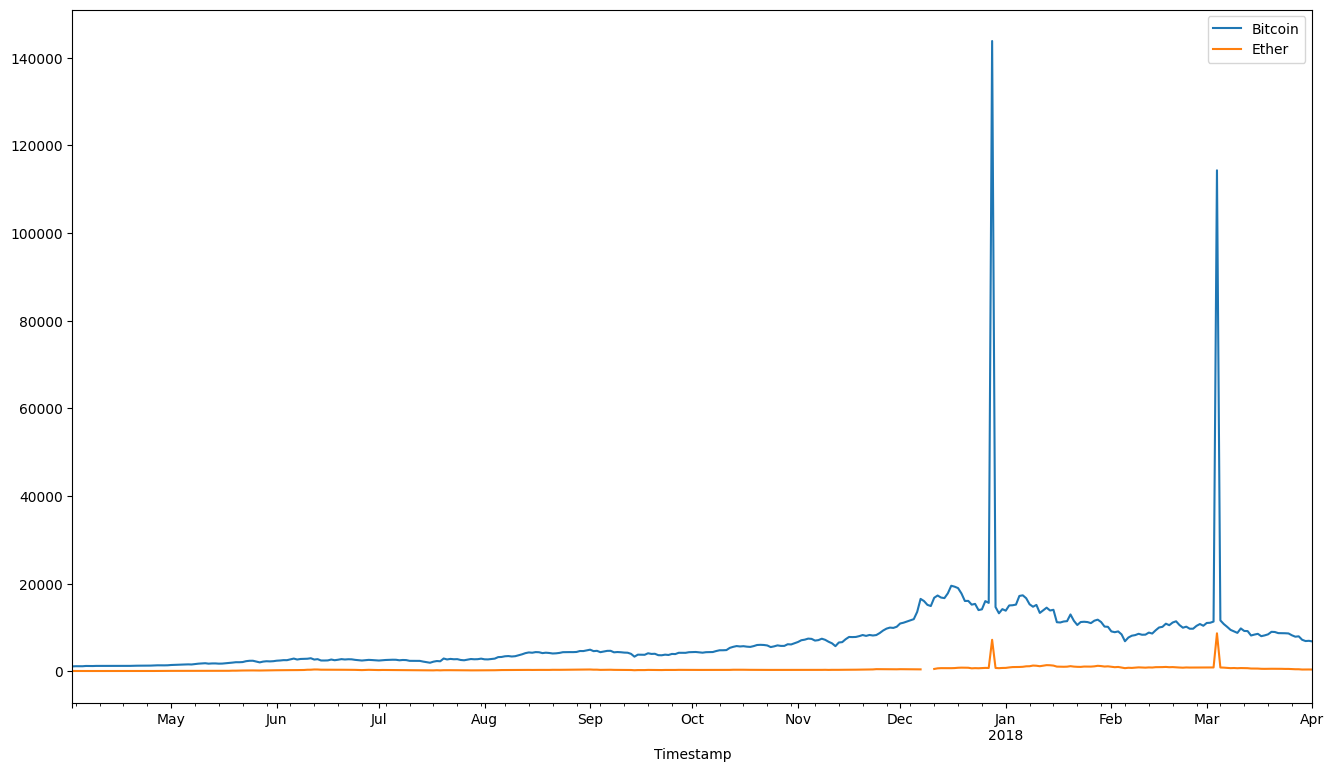

In [9]:
# run simple visualization 

df.plot(figsize=(16, 9))

<Axes: xlabel='Timestamp'>

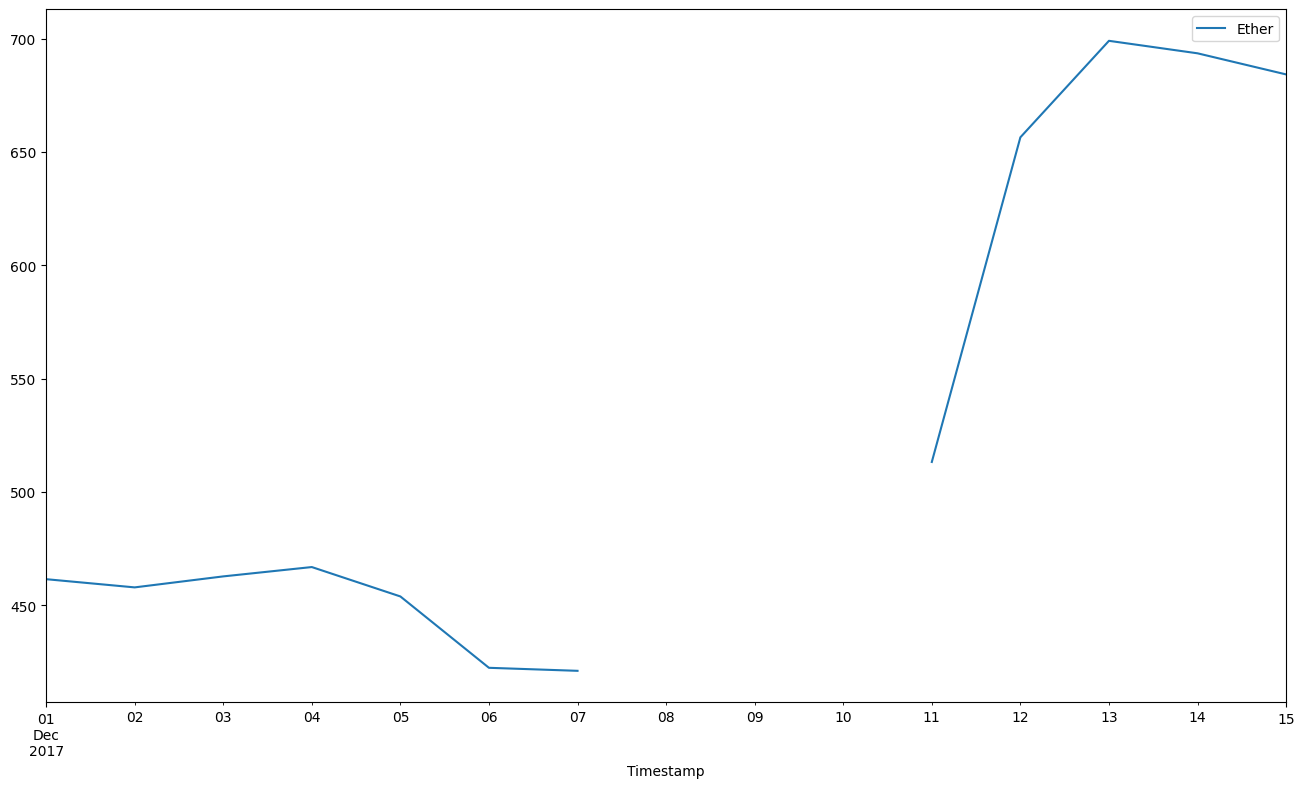

In [10]:
#  can see invalid values
# both ETH and BTC have huge spikes
# there seems to be some data missing in Ether between December 2017 and and January 2018

df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))  # "zoom in" to the missing data dates

In [12]:
df_na = df.loc['2017-12': '2017-12-15']

In [13]:
# Are those null values?

df_na['Ether'].isna().values.any()

# True = yes null 

True

In [14]:
# check when/what periods of time

df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [15]:
# add  more context:

df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [16]:
# use the previous value to fill missing values and just assume the price stayed the same

df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')

/var/folders/5k/cp4n1pls47gcgb620snyj2t00000gn/T/ipykernel_18500/33857168.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')


,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [17]:
df.fillna(method='bfill', inplace=True)

/var/folders/5k/cp4n1pls47gcgb620snyj2t00000gn/T/ipykernel_18500/3314729575.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


<Axes: xlabel='Timestamp'>

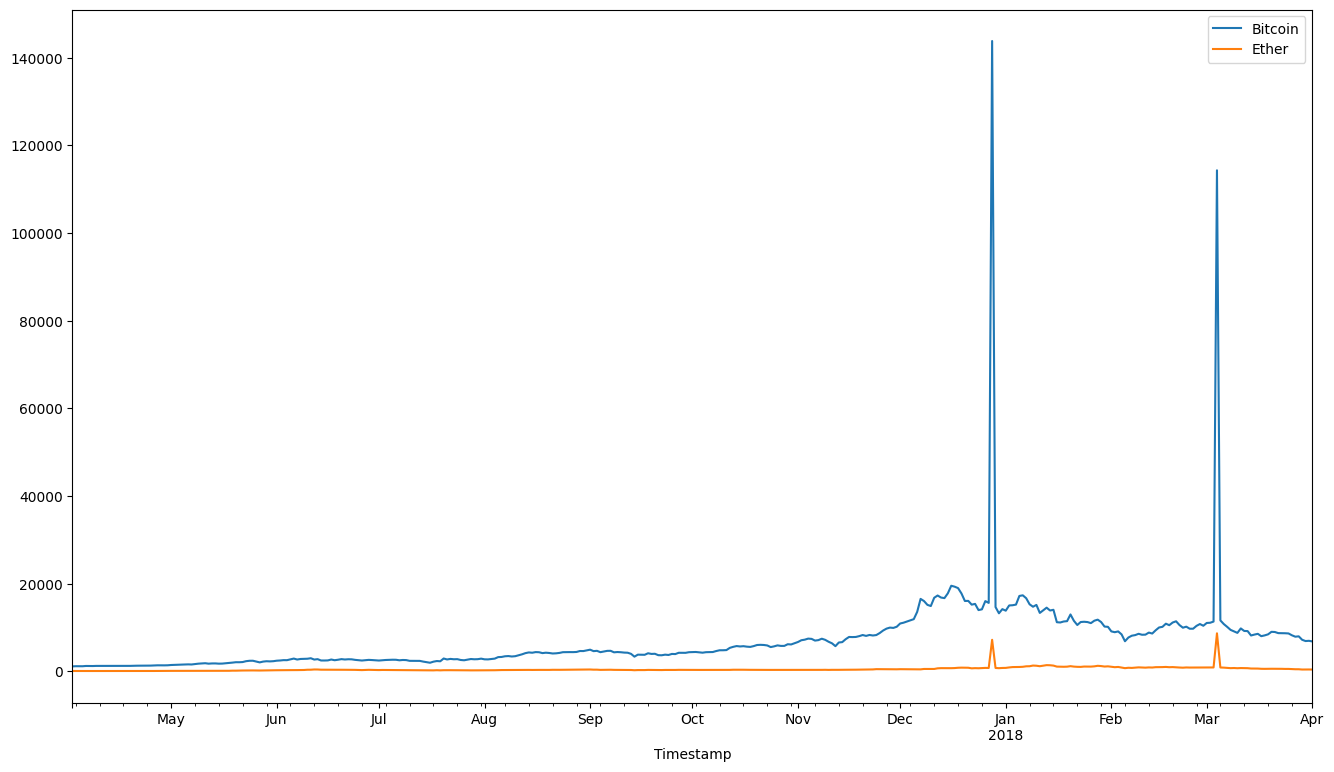

In [18]:
df.plot(figsize=(16, 9))

<Axes: xlabel='Timestamp'>

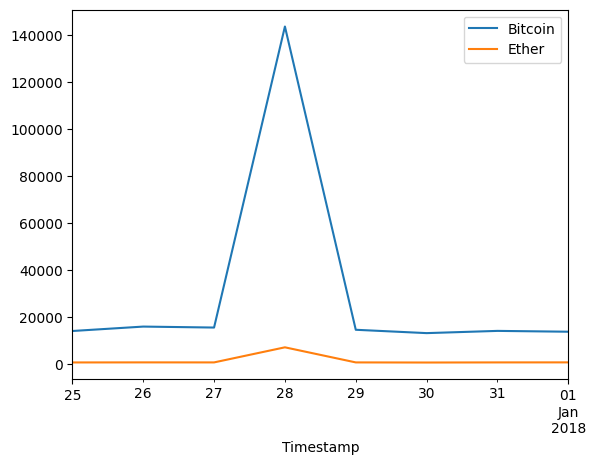

In [19]:
# fix the huge spikes
# first step -> identifying them visually
#            -> spikes seem to be located in the last 10 days of Dec 2017 and first of March 2018

df['2017-12-25':'2018-01-01'].plot()

<Axes: xlabel='Timestamp'>

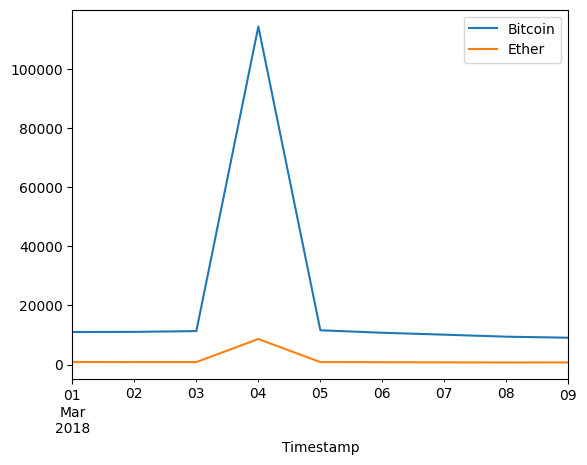

In [20]:
df['2018-03-01': '2018-03-09'].plot()

In [21]:
# according to plot, spikes are located in '2017-12-28' and '2018-03-04':

df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))
# remove specified rows 

<Axes: xlabel='Timestamp'>

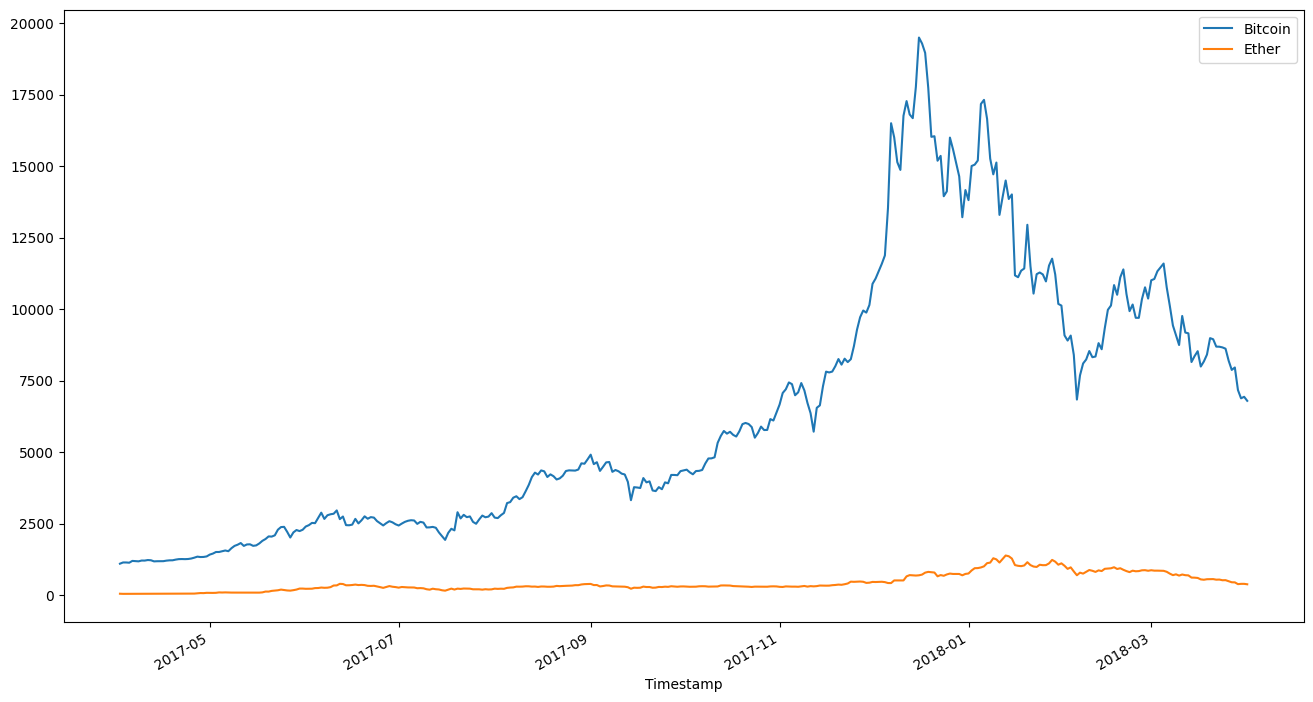

In [22]:
df_cleaned.plot(figsize=(16, 9))

# figure size set to 16 in width by 8 in height


Cleaning Analysis
    - Visuals help make sense of data and judge if analysis is on right track
    - BUT, with more powerful data -> analysis is a powerful method that helps
    - Analytic methods
        - Identify outliers /spikes /skewed values

Central Tendency 
    - Common set of indicators will be used to measure central tendency and identify outliers
    - mean
        - most common and popular one 
        - really sensitive to outliers

In [23]:
# mean of dataset with invalid numbers is: 

df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [24]:
# df.mean() results in high numbers for both bitcoin and ether
# due to outliers skewing with mean

df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

In [25]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

Visualizing Code
    - Use charts before + Seaborn to visualize distribution of values 
    - Scenario: Interested in histogram 

<Axes: ylabel='Frequency'>

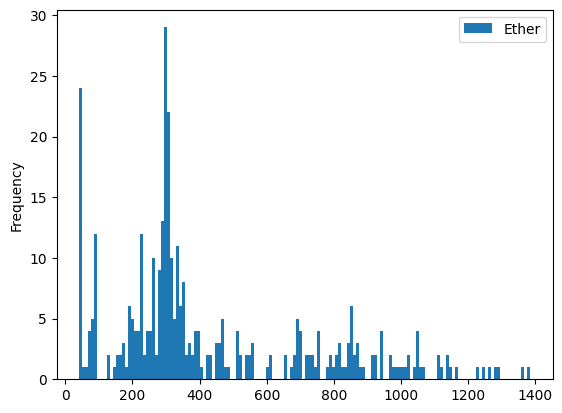

In [27]:
df_cleaned.plot(kind='hist', y='Ether', bins=150)

# df_cleaned: Pandas DataFrame containing data -> plotting a histogram for a specific column within DataFrame
# .plot(): Pandas method for creating various types of plots, kind='hist' -> indicated histogram
# y='Ether': specifies which column from DataFrame should be used for the histogram -> 'Ether' column
# bins=150: controls the number of bins (intervals or bars) in the histogram
#           -> setting to 150: histogram will have 150 bins to represent the distribution of data

<Axes: ylabel='Frequency'>

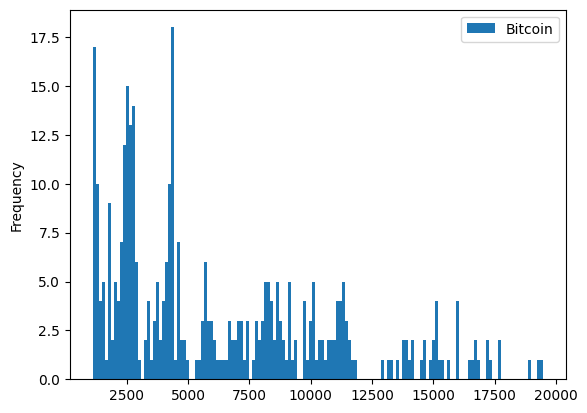

In [28]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150)

/var/folders/5k/cp4n1pls47gcgb620snyj2t00000gn/T/ipykernel_18500/112991813.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Ether'], ax=ax)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Con

<Axes: xlabel='Ether', ylabel='Density'>

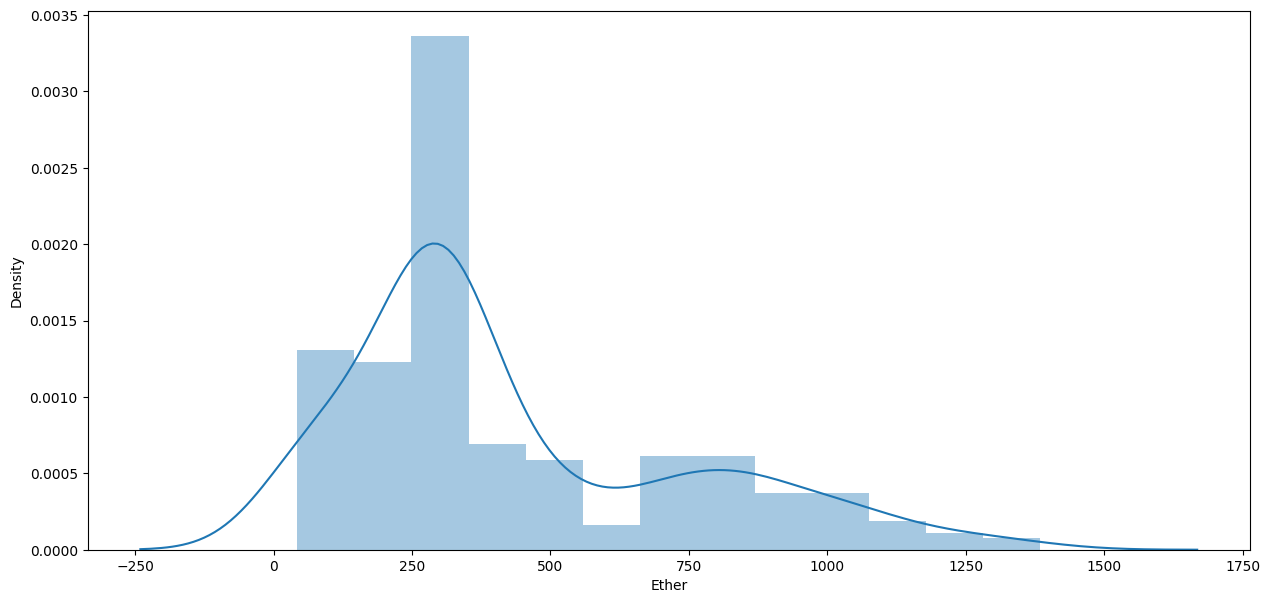

In [29]:
#  seaborn:

fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Ether'], ax=ax)

/var/folders/5k/cp4n1pls47gcgb620snyj2t00000gn/T/ipykernel_18500/3559312923.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], rug=True, ax=ax)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

<Axes: xlabel='Bitcoin', ylabel='Density'>

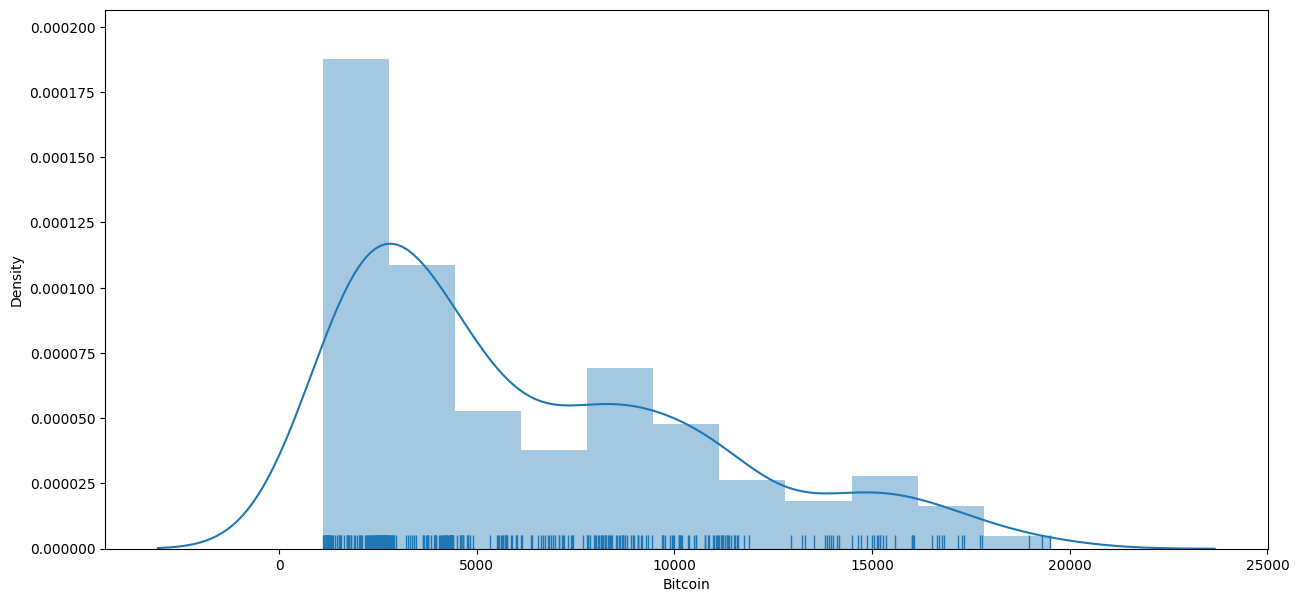

In [30]:
# create a figure and axis for the plot with a size of 15 inches in width and 7 inches in height
fig, ax = plt.subplots(figsize=(15, 7))

# create a histogram with a rug plot using sns.distplot
sns.distplot(df_cleaned['Bitcoin'], rug=True, ax=ax)

/var/folders/5k/cp4n1pls47gcgb620snyj2t00000gn/T/ipykernel_18500/3001299526.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498:

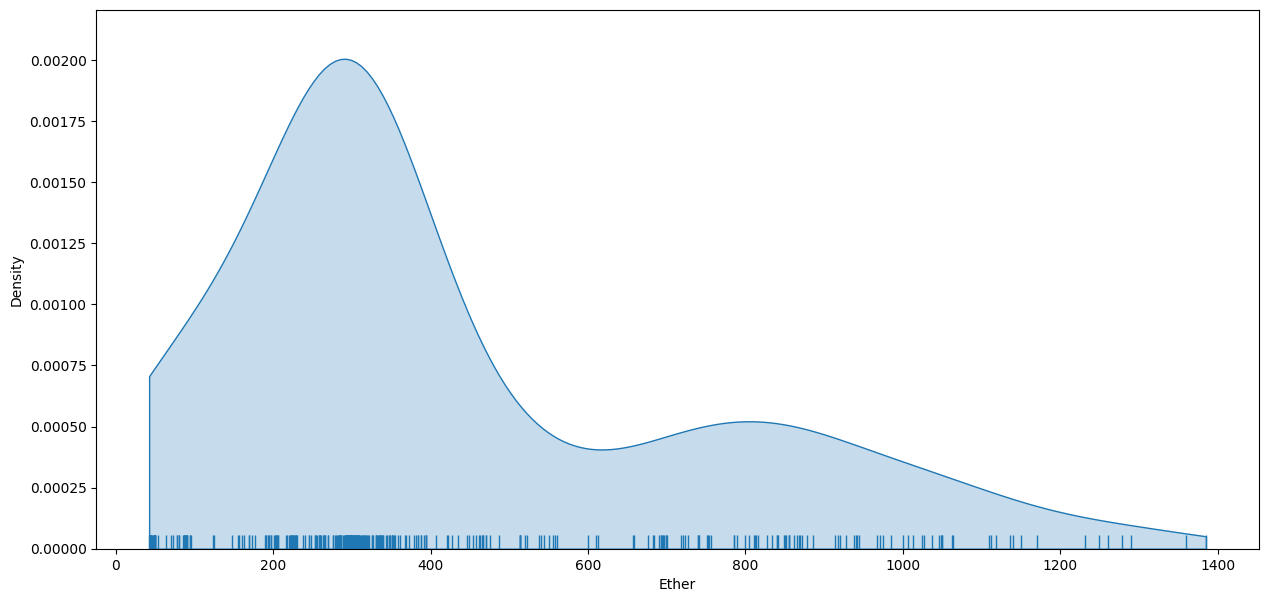

In [31]:
# create a Matplotlib figure (fig) and an axis (ax) for the plot ->size of 15 in width and 7 in height
fig, ax = plt.subplots(figsize=(15, 7))

#  create the KDE plot (kernel density estimate) using Seaborn's kdeplot function
sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)
#       df_cleaned['Ether'] specifies the data column ('Ether') to be plotted.
#       shade=True fills the area under the KDE curve with a color.
#       cut=0 ensures that the KDE curve extends to the minimum and maximum data points, without being cut off at the edges.

# add rug plot to the same axis (ax) using Seaborn's rugplot function
sns.rugplot(df_cleaned['Ether'], ax=ax);

/var/folders/5k/cp4n1pls47gcgb620snyj2t00000gn/T/ipykernel_18500/2782738058.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

<Axes: xlabel='Bitcoin', ylabel='Density'>

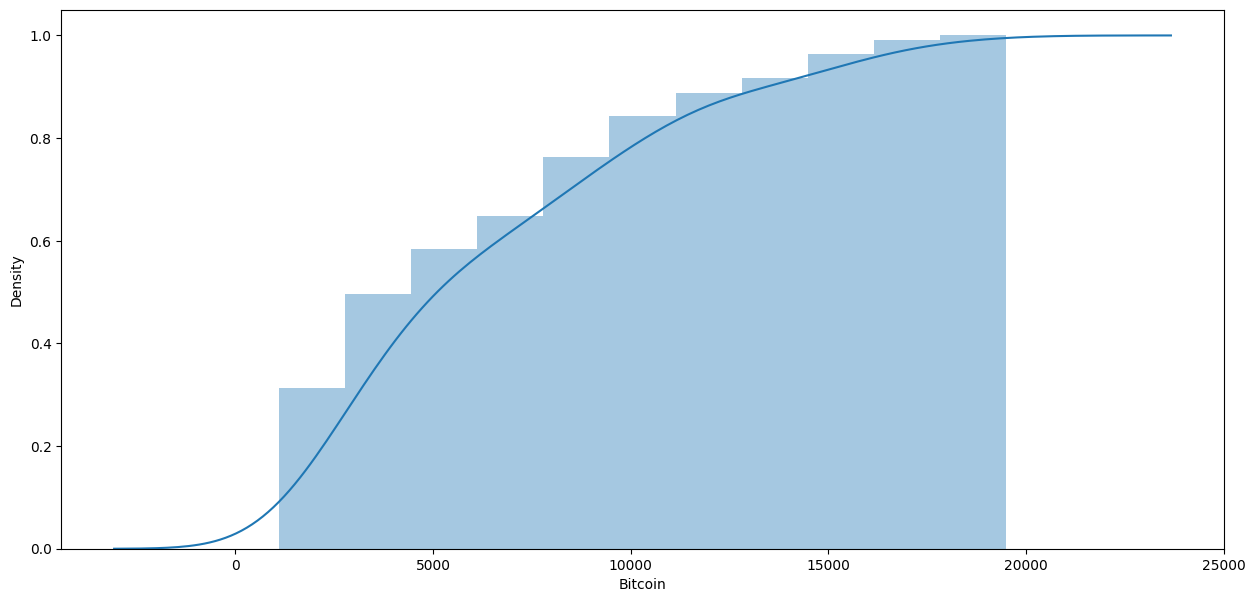

In [32]:
# visualize a cumulative plot of distribution:

# uses Seaborn to create a cumulative distribution plot for the 'Bitcoin' column in the df_cleaned DataFrame


fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

# plot shows how many samples fall behind a certain value

In [ ]:
#  increase number of bins in order to have more detail

fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

Visualizing Bivariate Distributions 
    - Most common way to observe a bivariate distribution is a scatter plot 
    - jointplot also includes distribution of variables 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

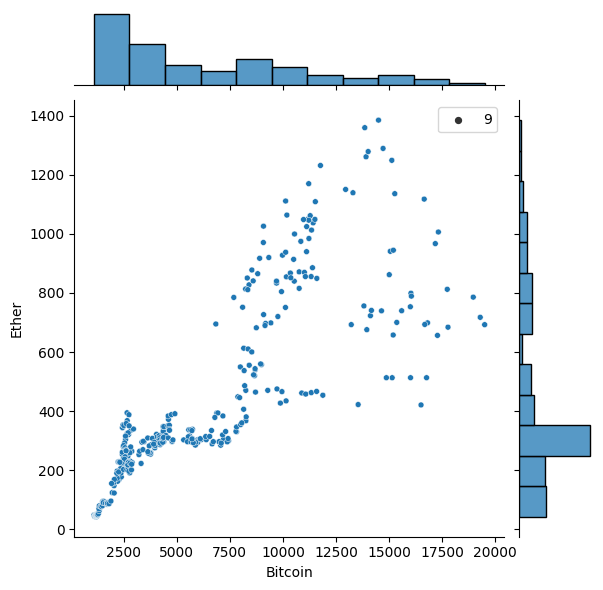

In [33]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, size=9)

# sns.jointplot(): Seaborn function -> create a joint plot
# -> which combines scatter plots for both variables ('Bitcoin' and 'Ether') along with histograms for each variable's distribution
# The joint plot lets you visualize the relationship between two variables and their individual distributions

<Axes: xlabel='Bitcoin', ylabel='Ether'>

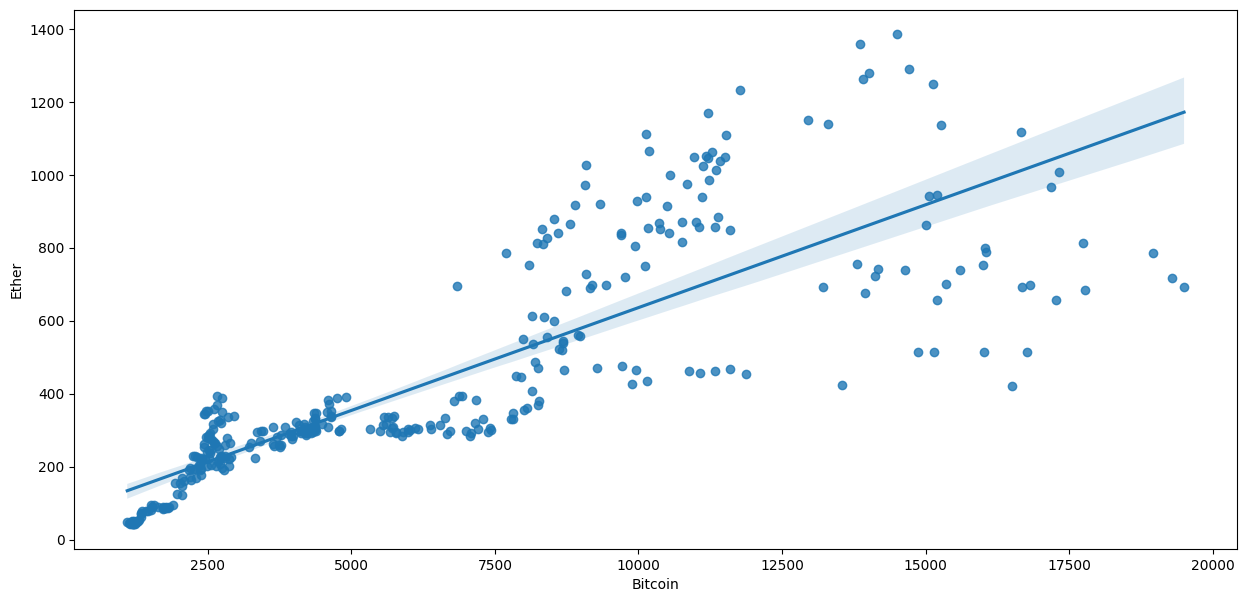

In [34]:
# only a scatter plot->  regplot method
# also fits a linear regression model in the plot

fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="Bitcoin", y="Ether", data=df_cleaned, ax=ax)

Quantiles, Quartiles and Percentiles 

In [35]:
df_cleaned['Bitcoin'].quantile(.2)

# df_cleaned['Bitcoin']: selects the 'Bitcoin' column from the DataFrame df_cleaned
# .quantile(.2): calculates the specified quantile -> .2 = 20%

2438.8627342857144

/var/folders/5k/cp4n1pls47gcgb620snyj2t00000gn/T/ipykernel_18500/2848836076.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future 

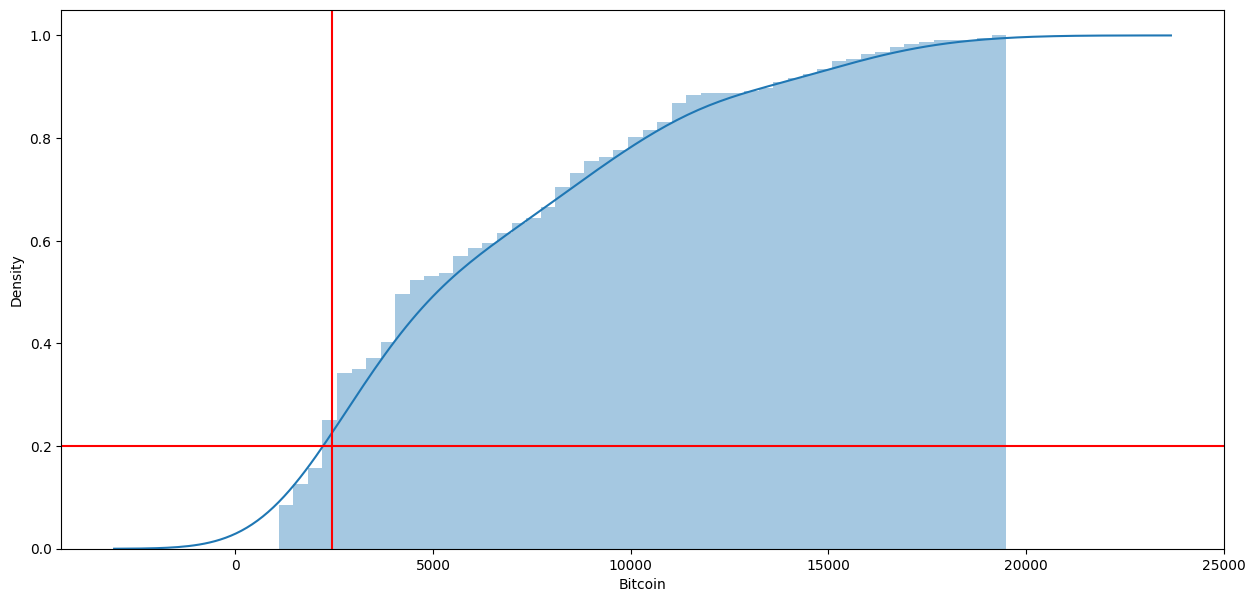

In [36]:
# create a cumulative distribution plot (with a vertical and horizontal red line) 
# for the 'Bitcoin' column in the df_cleaned DataFrame using Seaborn and Matplotlib

# create a figure and axis for the plot with a size of 15 inches in width and 7 inches in height
fig, ax = plt.subplots(figsize=(15, 7)) 

# Create a cumulative distribution plot using sns.distplot
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

# Add a horizontal red line at y=0.2
ax.axhline(0.2, color='red')

# Add a vertical red line at the 20th percentile
ax.axvline(df_cleaned['Bitcoin'].quantile(.2), color='red')

In [37]:
df_cleaned['Bitcoin'].quantile(.5)

4580.387479999999

In [38]:
df_cleaned['Bitcoin'].median()

4580.387479999999

/var/folders/5k/cp4n1pls47gcgb620snyj2t00000gn/T/ipykernel_18500/1559582923.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future 

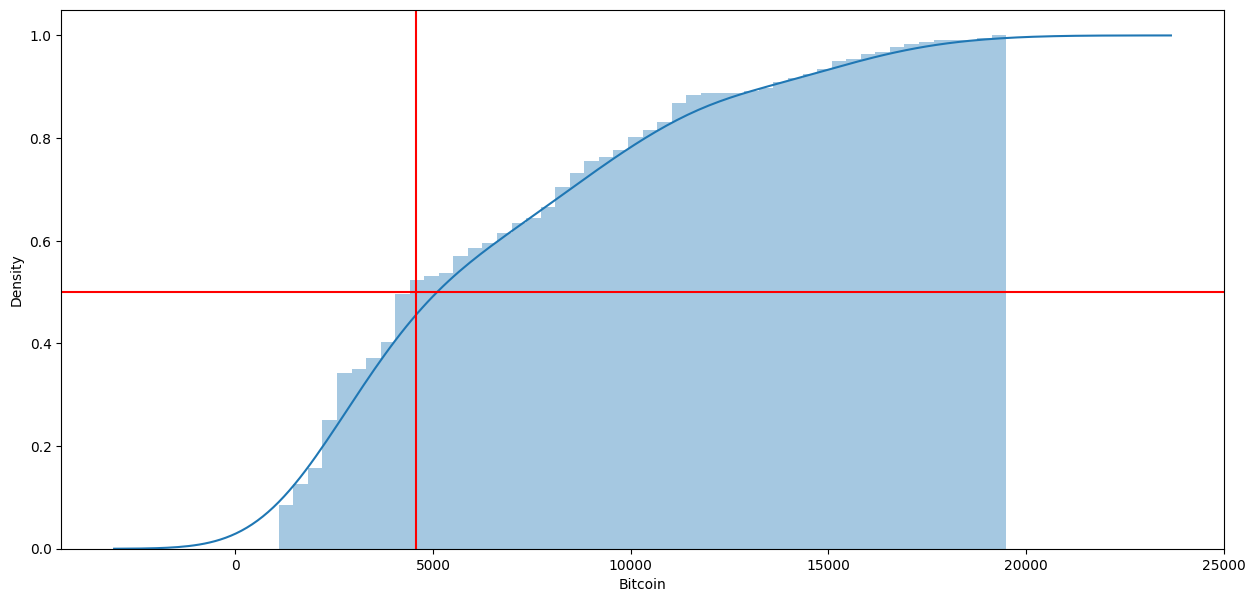

In [39]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.5), color='red')

/var/folders/5k/cp4n1pls47gcgb620snyj2t00000gn/T/ipykernel_18500/1105448284.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future 

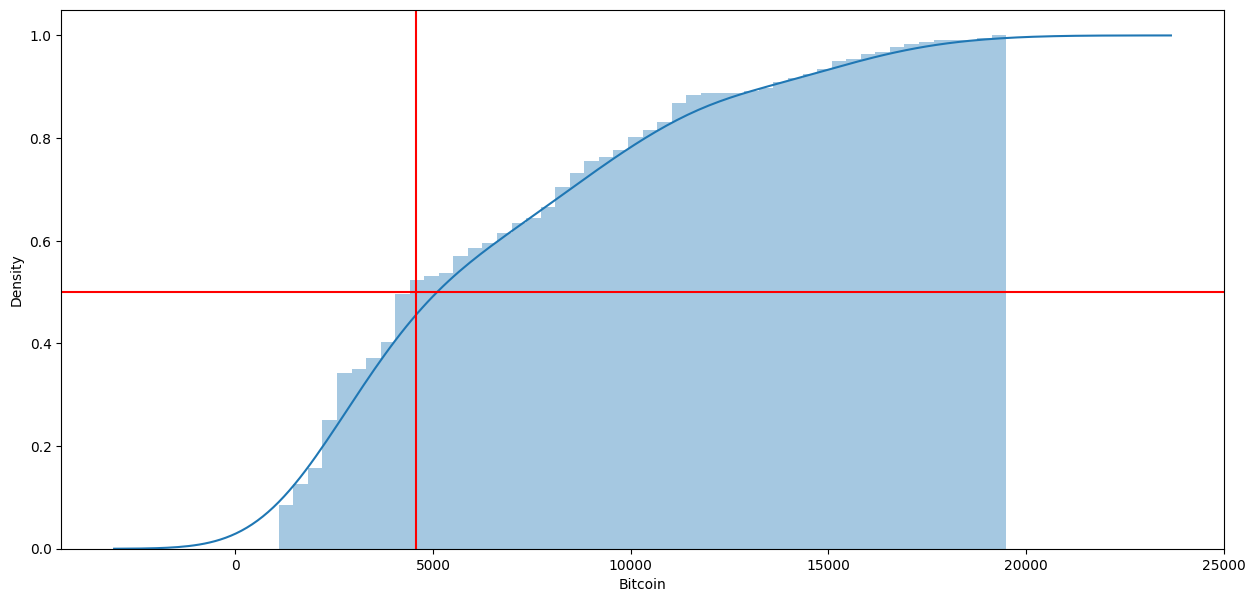

In [40]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].median(), color='red')

Dispersion
- Some methods to measure dispersion in a dataset:
    - Range
    - Variance and Standard Deviation
        - Variance: statistical measure that quantifies the spread or dispersion of data points in a dataset
              - measures how each data point in the column deviates from the mean (average) of the column
        - Standard deviation: statistical measure that quantifies the amount of variation or dispersion in a dataset
              - measures how each data point in the column deviates from the mean (average) of the column
    - IQR
        - Statistical measure that represents the range between the 75th percentile (Q3, the third quartile) and the 25th percentile (Q1, the first quartile) of a dataset

In [41]:
# RANGE  - > max - min values 

df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

In [42]:
# Range is really sensitive to outliers
# if range value is extremely high -> might indicate the presence of outliers / invalid values

df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.51420833333

In [43]:
# VARIANCE AND STANDARD DEVIATION

# calculate the variance of the 'Bitcoin' column in the DataFrame df
df['Bitcoin'].var()

103766537.75278121

In [44]:
# calculate the standard deviation of the 'Bitcoin' column in the DataFrame df

df['Bitcoin'].std()

10186.586167739475

In [45]:
# variance and std are sensible to outliers as well
# check with cleaned dataset:

df_cleaned['Bitcoin'].std()

4513.757662530282

In [47]:
# IQR - The interquartile range is a good measure of "centered" dispersion 
#     - Calculated as Q3 - Q1 (3rd quartile - 1st quartile)

df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

# df['Bitcoin']: This part selects the 'Bitcoin' column from the DataFrame df
#.quantile(.75): This calculates the 75th percentile (Q3) of the selected column
# .quantile(.25): This calculates the 25th percentile (Q1) of the selected column
# - :  used to find the difference between the 75th percentile and the 25th percentile, which gives you the IQR

6597.494147619047

In [48]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25)

6548.249242559523

Analytical Analysis of Invalid Values 

In [49]:
# Using std: Z scores
# define values that are a couple of Z scores above or below the mean (or the max/min value)
# calculates upper and lower limits for identifying potential outliers in the 'Bitcoin' column of the DataFrame df using the z-score method


upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

In [50]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.17635730169
Lower Limit: -13377.16831365621


/var/folders/5k/cp4n1pls47gcgb620snyj2t00000gn/T/ipykernel_18500/1109975596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bitcoin'], ax=ax)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert 

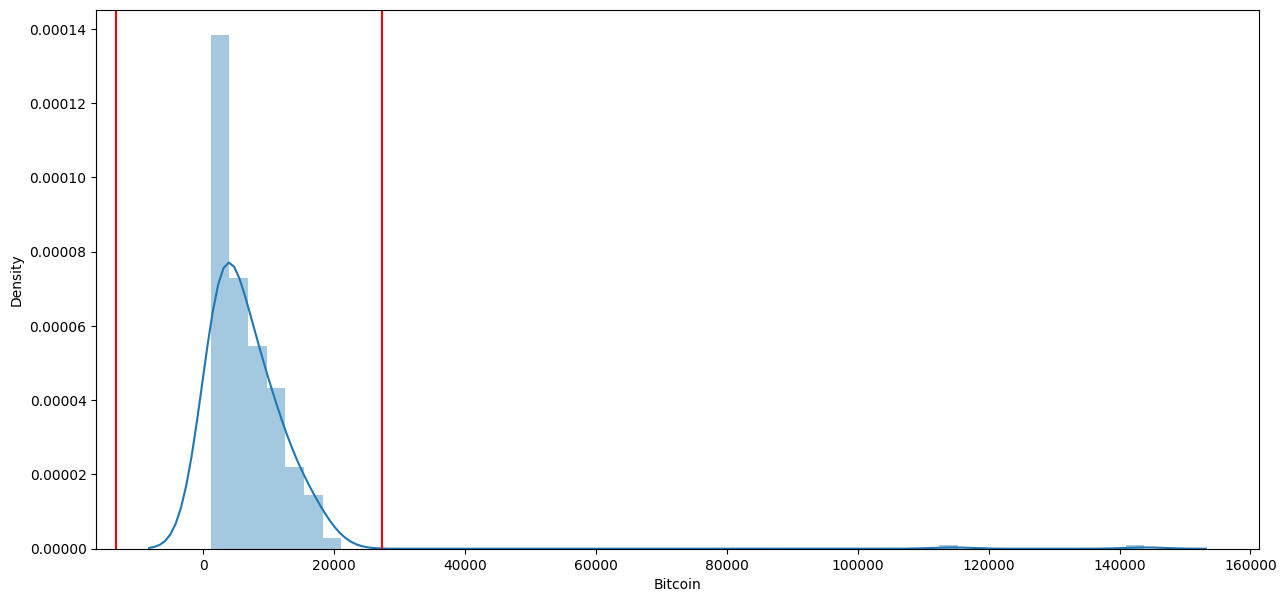

In [51]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

In [52]:
# Using IQRs
# use the IQR instead of std if the standard deviation might be too affected by the outliers/invalid values

iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [53]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

In [54]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.992317060834
Lower Limit: -6198.9842734153535


/var/folders/5k/cp4n1pls47gcgb620snyj2t00000gn/T/ipykernel_18500/1109975596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bitcoin'], ax=ax)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert 

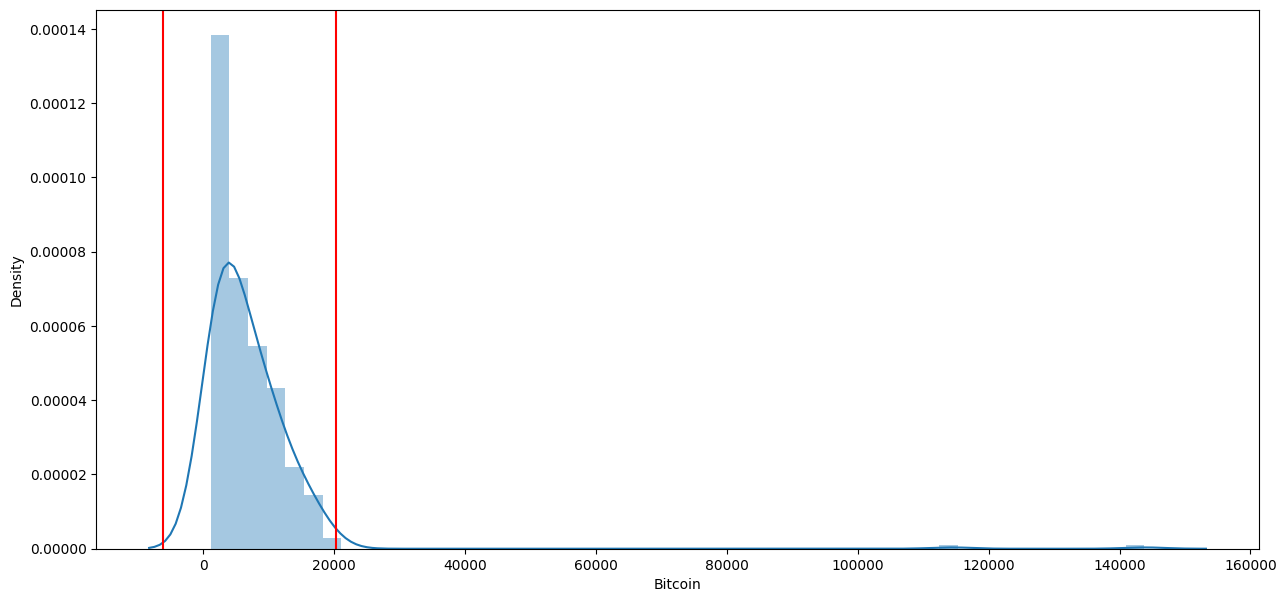

In [55]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Cleaning Invalid Values Analytically 
    - Removing invalid values 
    - Using upper limit defined by standard deviation 

In [56]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()

<Axes: xlabel='Timestamp'>

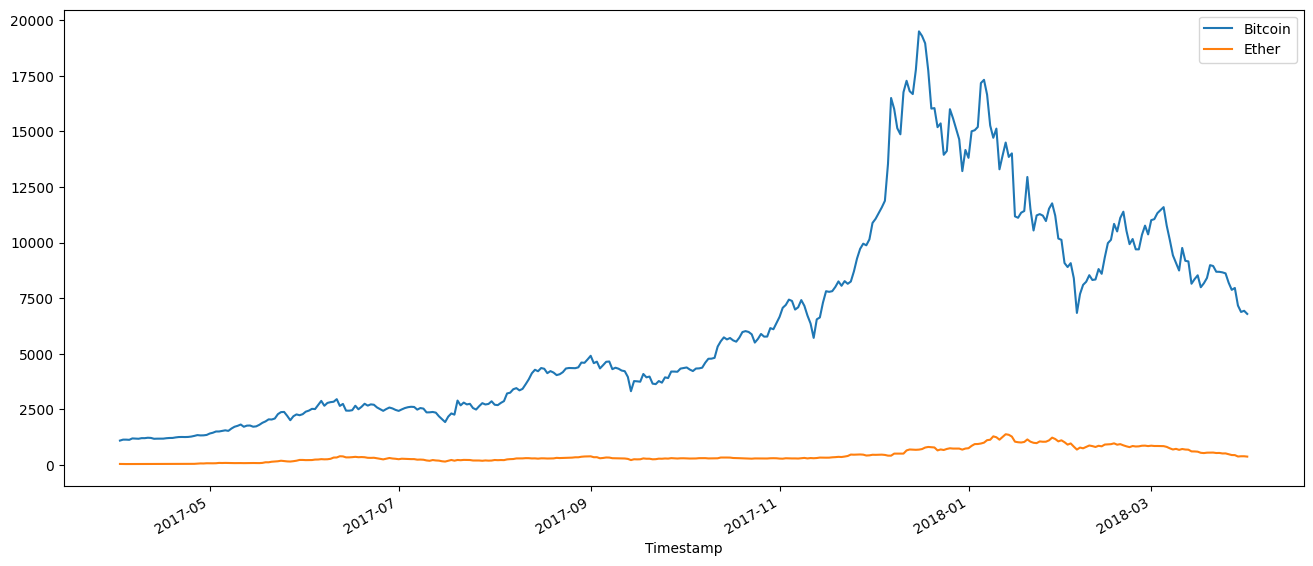

In [57]:
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

<Axes: xlabel='Timestamp'>

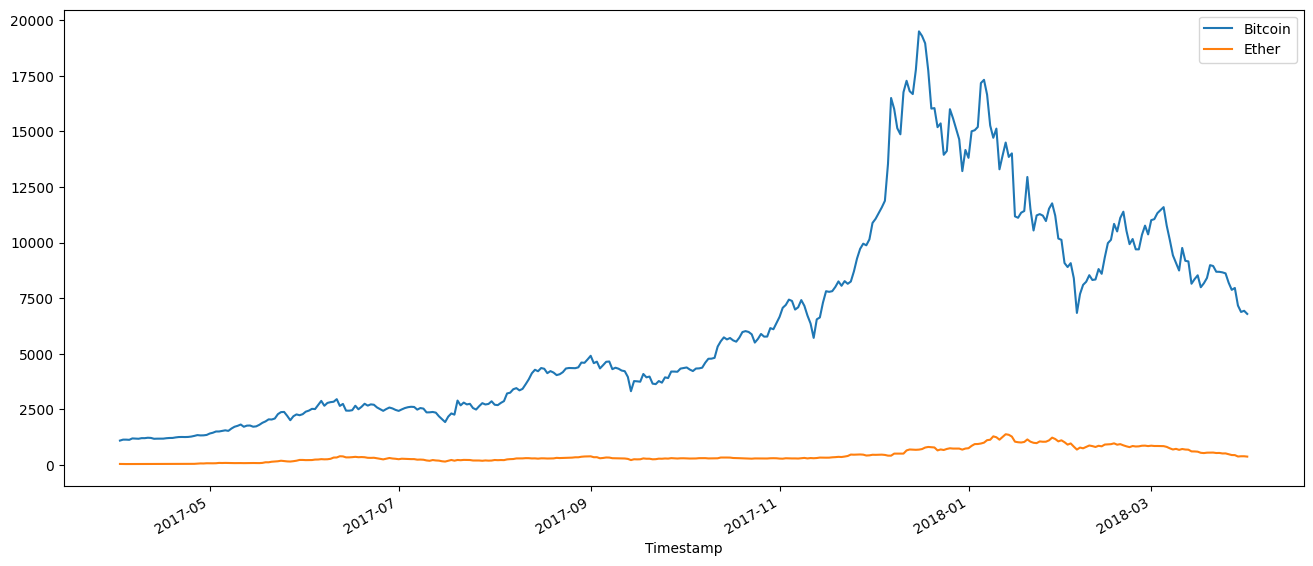

In [58]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))